In [5]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'A Sustainability Analysis Report'
     '</div>')

In [84]:
## Recommend adoption: Random Forest Regressor Model

# Least MAE value among other models.

# Mean Absolute Error (MAE): 1.9109564511002828
# Mean Squared Error (MSE): 14.818336587701493
# R² Score: 0.9827876336317795

In [7]:
# Import necessary libraries
import pandas as pd

# Load the datasets
continent_df = pd.read_excel('Continent.xlsx')
country_df = pd.read_excel('Country.xlsx')
data_dictionary_df = pd.read_excel('Data Dictionary.xlsx')
electricity_df = pd.read_excel('Electricity.xlsx')
energy_df = pd.read_excel('Energy.xlsx')
sustainability_df = pd.read_csv('Sustainability Dataset.csv')

# Join the datasets based on 'Country Code' (assuming consistent codes across datasets)
merged_df = sustainability_df.merge(country_df, on='Country Code', how='left')
merged_df = merged_df.merge(electricity_df, on='Country Code', how='left')
merged_df = merged_df.merge(energy_df, on='Country Code', how='left')
# ... (consider merging with continent_data and data_dictionary_df based on appropriate columns)

# Data Cleaning (basic example)
# 1. Handle missing values
merged_df = merged_df.fillna(0)  # Replace missing values with 0 (adjust based on data context)

# 2. Convert data types (example for datetime)
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')


In [8]:
print(merged_df.head())

  Country Code  Year_x  \
0          ABW    2000   
1          ABW    2000   
2          ABW    2000   
3          ABW    2000   
4          ABW    2000   

   Access to electricity (% of population) - EG.ELC.ACCS.ZS_x  \
0                                          91.660398            
1                                          91.660398            
2                                          91.660398            
3                                          91.660398            
4                                          91.660398            

   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG  \
0                                                0.0                                  
1                                                0.0                                  
2                                                0.0                                  
3                                                0.0                                  
4                

In [16]:
# Load the CSV file
df = pd.read_csv('Sustainability Dataset.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 51 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Country Code                                                                                  3287 non-null   object 
 1   Year                                                                                          3287 non-null   int64  
 2   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      3193 non-null   float64
 3   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG              2566 non-null   float64
 4   Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS    2628 non-null   float64
 5   Adjusted savings: carbon di

In [18]:
df.head()

,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",...,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS
0,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,NaN,...,2.378,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN
1,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,NaN,...,2.407,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339
2,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,NaN,...,2.437,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972
3,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,NaN,...,2.561,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606
4,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,NaN,...,2.616,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240


In [20]:
df.describe()

,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS,...,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2","Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Gini index (World Bank estimate) - SI.POV.GINI,Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS
count,3287.000000,3193.000000,2566.000000,2628.000000,3220.000000,3094.000000,3111.000000,3099.000000,2285.000000,2777.000000,...,1807.000000,1806.000000,3285.000000,1303.000000,2986.000000,3096.000000,3.106000e+03,3278.000000,3053.000000,3106.000000
mean,2009.000000,79.300662,2.499857,8.870028,1.742674,3.812051,0.692833,0.880541,45.391741,57.034297,...,7.987327,9.810687,174.646907,37.512203,33.117667,70.160098,3.891506e+07,42.890186,7.015880,57.264100
std,5.478059,30.398748,18.752649,12.277347,1.957442,6.958003,2.657800,1.084312,45.915444,43.806176,...,5.781539,7.159265,757.653194,8.595502,29.386654,9.205632,1.413757e+08,22.705962,10.730922,22.687638
min,2000.000000,1.270180,-645.655290,-97.524776,0.090292,0.000000,0.000000,0.009500,0.000000,2.857408,...,0.100000,0.200000,0.048000,23.700000,0.000000,40.369000,6.967100e+04,0.000000,0.000000,8.461000
25%,2004.000000,62.900000,-0.246761,3.339159,0.741310,0.078542,0.000000,0.149597,9.558670,27.222821,...,4.100000,4.725000,2.426000,30.900000,6.000000,65.109000,2.406866e+06,24.816500,0.385851,39.546750
50%,2009.000000,98.653969,2.545392,8.752619,1.145867,0.878741,0.000000,0.388686,34.951665,47.054379,...,6.400000,7.500000,12.621000,35.600000,25.000000,72.564634,8.368371e+06,42.648000,2.122046,57.450000
75%,2014.000000,100.000000,5.545831,15.290790,2.056927,4.656705,0.097040,1.286091,62.252217,72.465711,...,10.000000,12.800000,72.012000,42.800000,58.000000,76.572750,2.605396e+07,60.732750,8.878282,75.372500
max,2018.000000,100.000000,229.493078,45.354086,27.101473,71.290764,40.772569,6.542877,324.172288,396.185604,...,37.000000,42.800000,9956.569000,64.800000,99.652849,84.934146,1.392730e+09,91.754000,81.949962,100.000000


In [22]:
# check for missing values

df.isnull().sum()

Country Code                                                                                       0
Year                                                                                               0
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                          94
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG                 721
Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS       659
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS                            67
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS                     193
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS                            176
Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS                     188
Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5                     

In [23]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("Sustainability dataset.csv")

# Print descriptive statistics of the dataset
print(df.describe(include='all'))

       Country Code         Year  \
count          3287  3287.000000   
unique          173          NaN   
top             ABW          NaN   
freq             19          NaN   
mean            NaN  2009.000000   
std             NaN     5.478059   
min             NaN  2000.000000   
25%             NaN  2004.000000   
50%             NaN  2009.000000   
75%             NaN  2014.000000   
max             NaN  2018.000000   

        Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
count                                         3193.000000          
unique                                                NaN          
top                                                   NaN          
freq                                                  NaN          
mean                                            79.300662          
std                                             30.398748          
min                                              1.270180          
25%                    

In [49]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'Exploratory Data Analysis'
     '</div>')

In [30]:
df.head()

,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",...,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS
0,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,NaN,...,2.378,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN
1,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,NaN,...,2.407,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339
2,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,NaN,...,2.437,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972
3,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,NaN,...,2.561,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606
4,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,NaN,...,2.616,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240


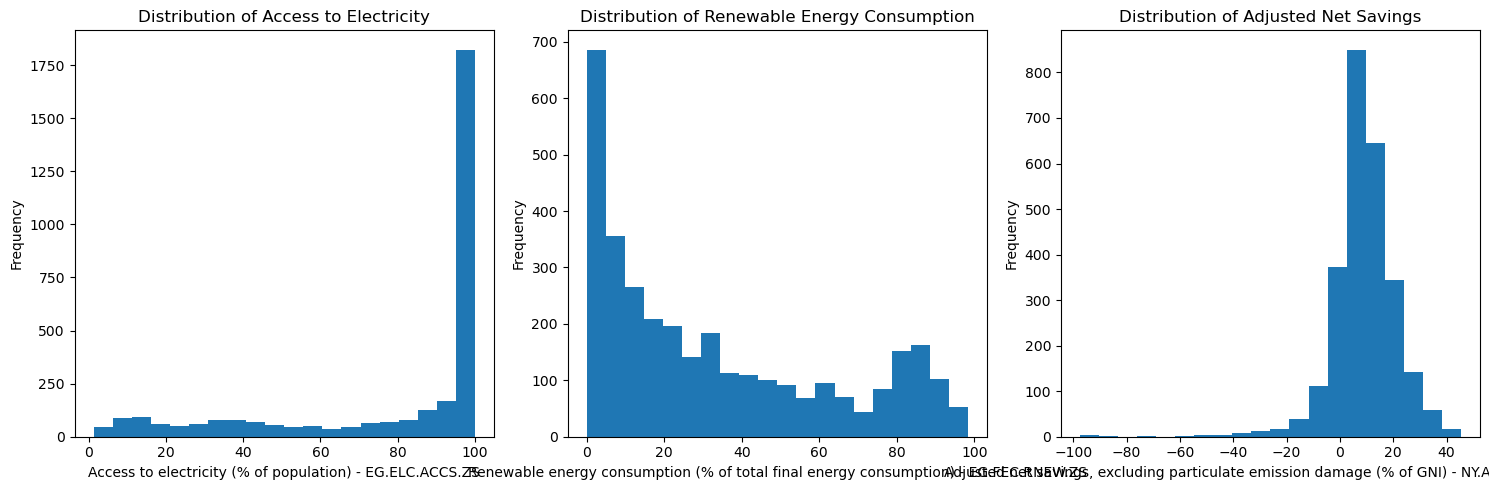

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sustainability Dataset.csv")

# Select the three variables for plotting
variables = ['Access to electricity (% of population) - EG.ELC.ACCS.ZS', 
             'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS', 
             'Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the first variable
axes[0].hist(df[variables[0]], bins=20)
axes[0].set_xlabel(variables[0])
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Access to Electricity')

# Plot the second variable
axes[1].hist(df[variables[1]], bins=20)
axes[1].set_xlabel(variables[1])
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Renewable Energy Consumption')

# Plot the third variable
axes[2].hist(df[variables[2]], bins=20)
axes[2].set_xlabel(variables[2])
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Adjusted Net Savings')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

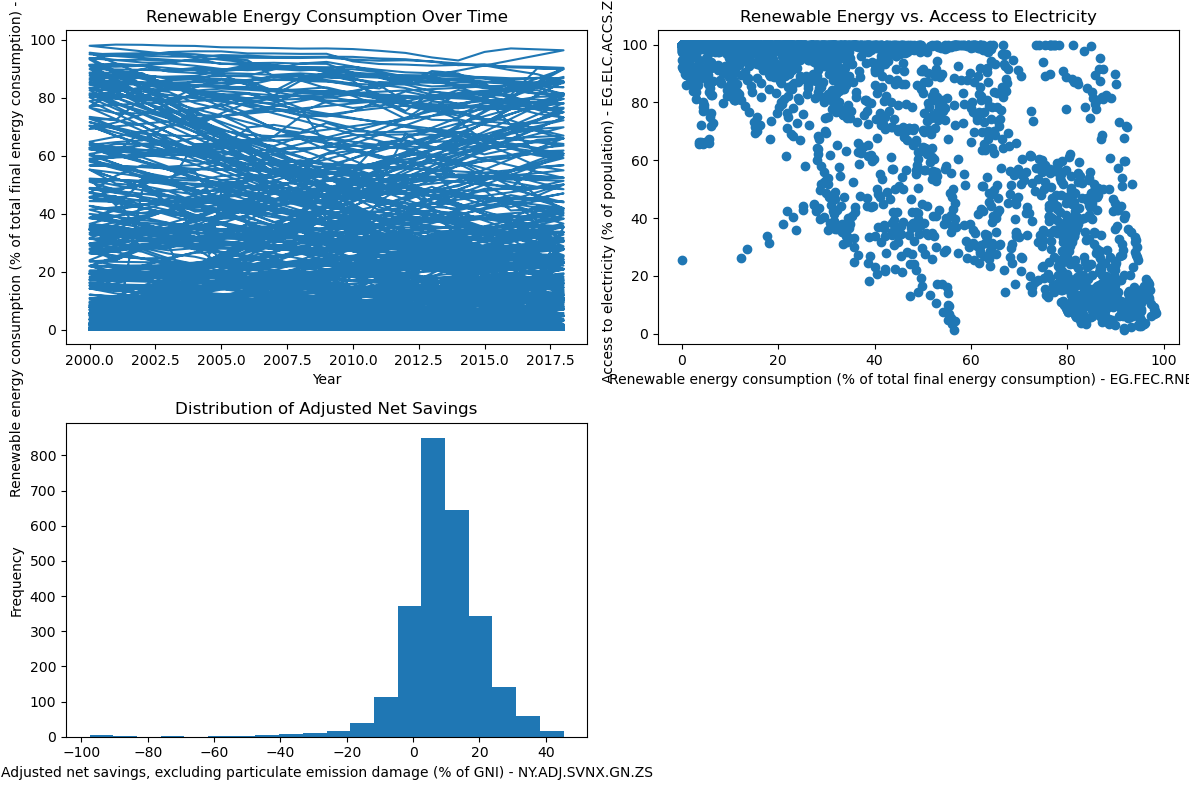

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sustainability Dataset.csv")

# Select variables for analysis
variables = [
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
    'Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS'
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Plot 1: Line Plot (Time Series)
axes[0].plot(df['Year'], df[variables[0]])
axes[0].set_xlabel('Year')
axes[0].set_ylabel(variables[0])
axes[0].set_title('Renewable Energy Consumption Over Time')

# Plot 2: Scatter Plot (Relationship between two variables)
axes[1].scatter(df[variables[0]], df[variables[1]])
axes[1].set_xlabel(variables[0])
axes[1].set_ylabel(variables[1])
axes[1].set_title('Renewable Energy vs. Access to Electricity')

# Plot 3: Histogram (Distribution of a variable)
axes[2].hist(df[variables[2]], bins=20)
axes[2].set_xlabel(variables[2])
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Adjusted Net Savings')

# Remove unused subplot (optional)
axes[3].axis('off') 

plt.tight_layout()
plt.show()

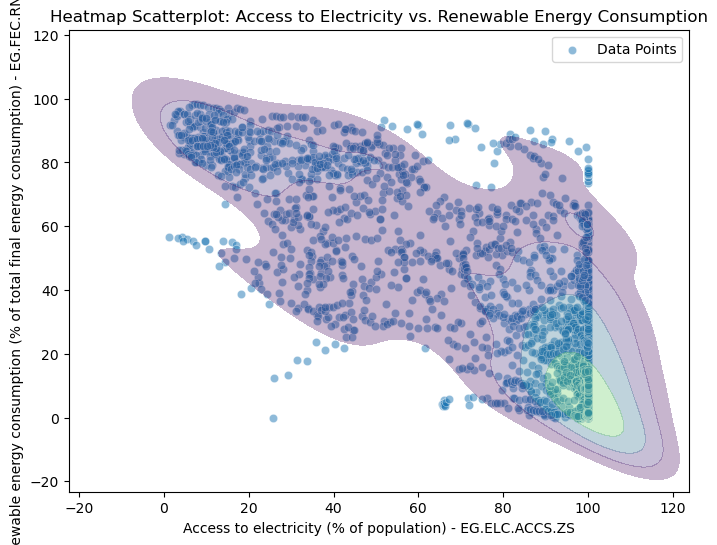

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Sustainability Dataset.csv")

# Select variables for analysis
x_var = 'Access to electricity (% of population) - EG.ELC.ACCS.ZS'
y_var = 'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'

# Create a heatmap scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_var, y=y_var, data=df, alpha=0.5, label="Data Points") 

# Add a color gradient to visualize data density
sns.kdeplot(x=df[x_var], y=df[y_var], cmap='viridis', fill=True, levels=5, alpha=0.3, label="Density")

# Add legend
plt.legend()

plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Heatmap Scatterplot: Access to Electricity vs. Renewable Energy Consumption')

plt.show()

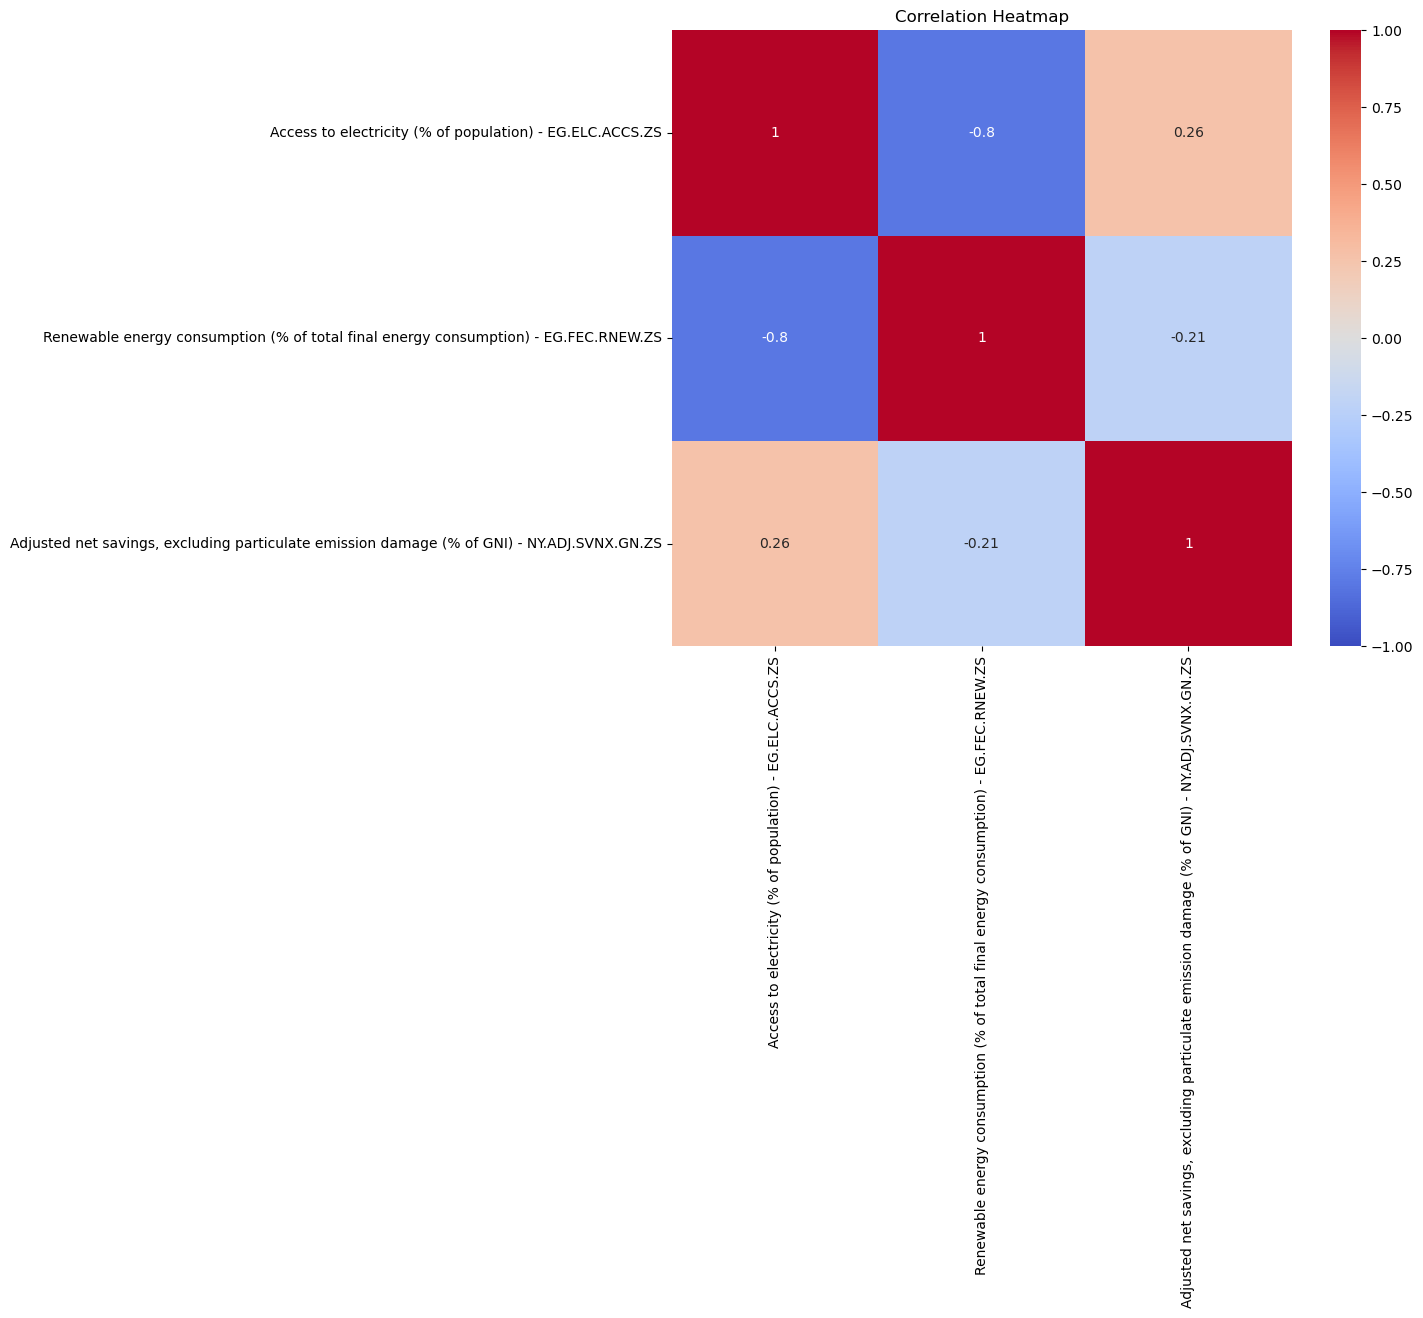

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sustainability Dataset.csv")

# Select relevant numerical columns (adjust as needed)
numerical_cols = [
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
    'Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS',
    # Add more numerical columns here
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [48]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'MACHINE LEARNING MODEL'
     '</div>')

In [61]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'Random Forest Regressor Model'
     '</div>')

Mean Absolute Error (MAE): 1.9109564511002828
Mean Squared Error (MSE): 14.818336587701493
R² Score: 0.9827876336317795


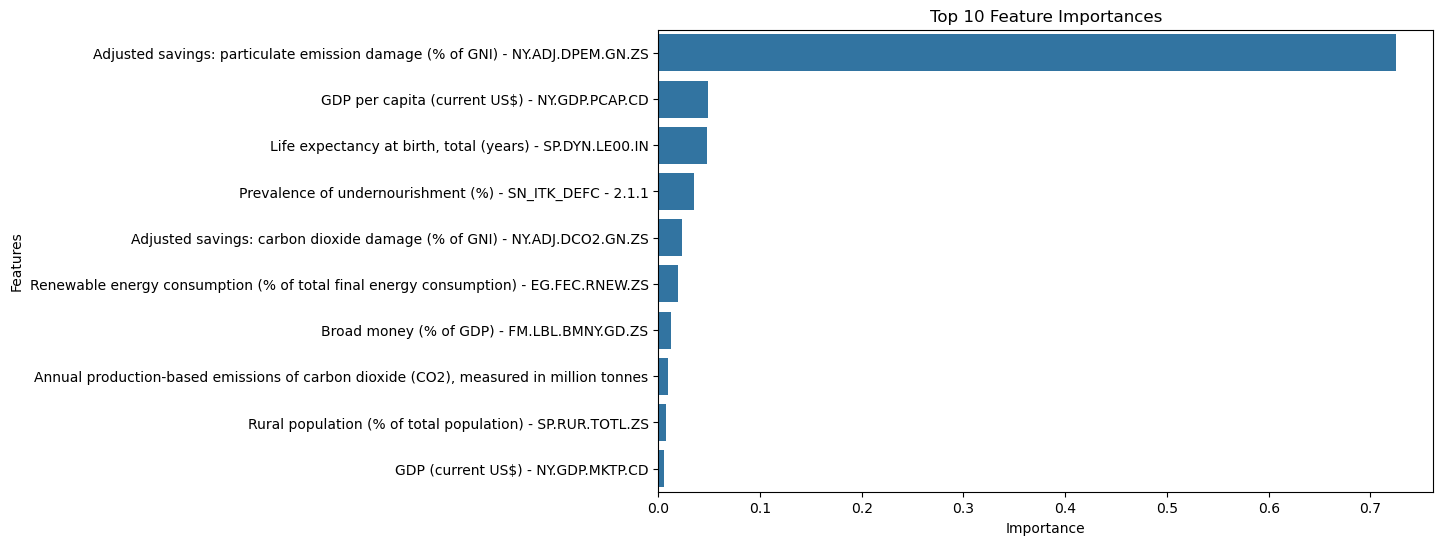

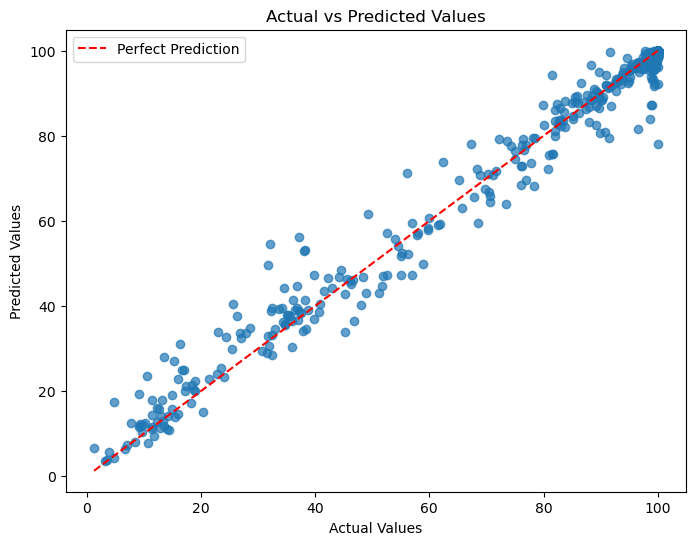

In [57]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_columns:
    if col in df.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))

# List of columns to drop
columns_to_drop = ['Country Code', 'Year', 'Income Classification', 'Regime Type (RoW Measure Definition)', target_column]

# Drop columns only if they exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

# Define target variable
y = df[target_column] if target_column in df.columns else None

if y is None:
    raise KeyError(f"Target column '{target_column}' is not found in the DataFrame.")

# Ensure `X` and `y` are numeric
X = X.select_dtypes(include=['number'])
y = y.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_indices[:10]], y=X.columns[sorted_indices[:10]])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()



In [63]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'Gradient Boosting Regressor Model'
     '</div>')

Mean Absolute Error (MAE): 2.949046021585925
Mean Squared Error (MSE): 25.082269468044377
R² Score: 0.9708654740783305


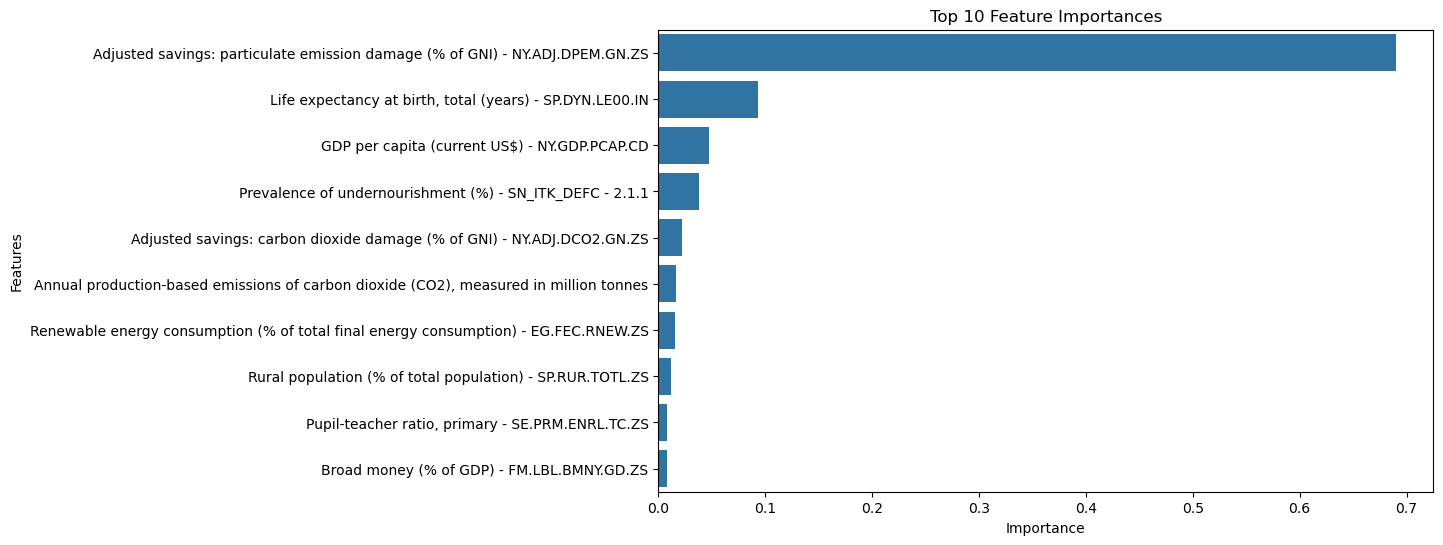

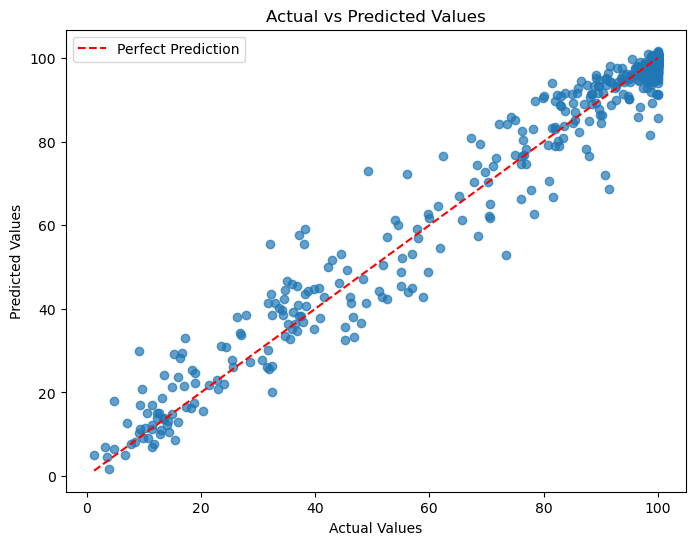

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_columns:
    if col in df.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))

# List of columns to drop
columns_to_drop = ['Country Code', 'Year', 'Income Classification', 'Regime Type (RoW Measure Definition)', target_column]

# Drop columns only if they exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

# Define target variable
y = df[target_column] if target_column in df.columns else None

if y is None:
    raise KeyError(f"Target column '{target_column}' is not found in the DataFrame.")

# Ensure `X` and `y` are numeric
X = X.select_dtypes(include=['number'])
y = y.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_indices[:10]], y=X.columns[sorted_indices[:10]])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [66]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'XGB Regressor Model'
     '</div>')

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 2.1/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 4.2/124.9 MB 7.4 MB/s eta 0:00:17
   -- ------------------------------------- 6.6/124.9 MB 8.6 MB/s eta 0:00:14
   --- ------------------------------------ 9.4/124.9 MB 9.6 MB/s eta 0:00:12
   --- ------------------------------------ 12.3/124.9 MB 10.6 MB/s eta 0:00:11
   ---- ----------------------------------- 15.2/124.9 MB 11.0 MB/s eta 0:00:10
   ----- ---------------------------------- 18.6/124.9 MB 11.9 MB/s eta 0:00:09
   ------- -------------------------------- 22.5/124.9 MB 12.6 MB/s eta 0:00:09
   -------- ------------------------------- 26.2/124.9 MB 13.2 MB/s eta 0:00:08
   --------- ------------------------------ 30.1/124.9 MB 13.8 MB/s eta 0:00:07
   ---------- ----------------------------- 34.3/124.9 MB 1

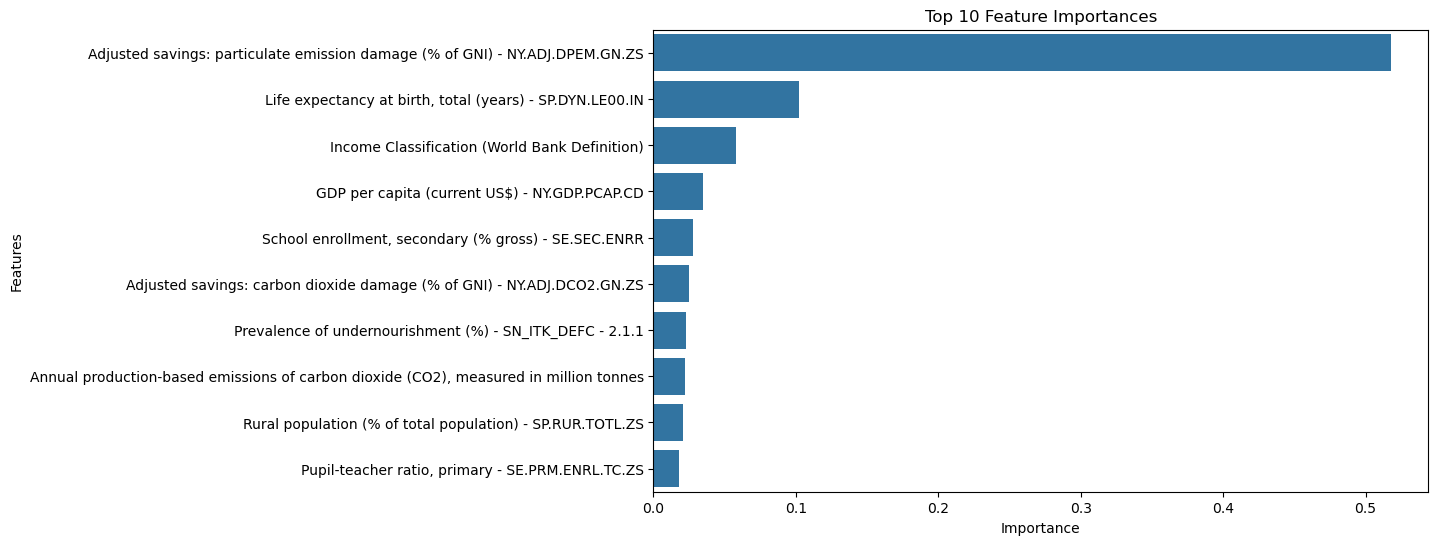

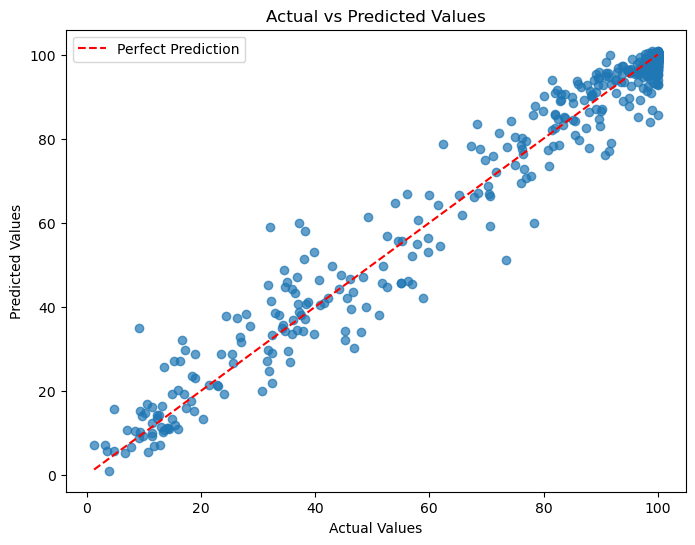

In [65]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_columns:
    if col in df.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))

# List of columns to drop
columns_to_drop = ['Country Code', 'Year', 'Income Classification', 'Regime Type (RoW Measure Definition)', target_column]

# Drop columns only if they exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

# Define target variable
y = df[target_column] if target_column in df.columns else None

if y is None:
    raise KeyError(f"Target column '{target_column}' is not found in the DataFrame.")

# Ensure `X` and `y` are numeric
X = X.select_dtypes(include=['number'])
y = y.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot feature importance
importance = model.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_indices[:10]], y=X.columns[sorted_indices[:10]])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [73]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'SVM Model'
     '</div>')

In [80]:
df.head()

,Country_Code,Year,Access_to_electricity__of_population__EGELCACCSZS,Adjusted_net_national_income_per_capita_annual__growth__NYADJNNTYPCKDZG,Adjusted_net_savings_excluding_particulate_emission_damage__of_GNI__NYADJSVNXGNZS,Adjusted_savings_carbon_dioxide_damage__of_GNI__NYADJDCO2GNZS,Adjusted_savings_natural_resources_depletion__of_GNI__NYADJDRESGNZS,Adjusted_savings_net_forest_depletion__of_GNI__NYADJDFORGNZS,Adjusted_savings_particulate_emission_damage__of_GNI__NYADJDPEMGNZS,Automated_teller_machines_ATMs_per_100000_adults__FBATMTOTLP5,...,Annual_productionbased_emissions_of_carbon_dioxide_CO2_measured_in_million_tonnes,Gini_index_World_Bank_estimate__SIPOVGINI,Income_Classification_World_Bank_Definition,Individuals_using_the_Internet__of_population__ITNETUSERZS,Life_expectancy_at_birth_total_years__SPDYNLE00IN,Population_total__SPPOPTOTL,Regime_Type_RoW_Measure_Definition,Rural_population__of_total_population__SPRURTOTLZS,Total_natural_resources_rents__of_GDP__NYGDPTOTLRTZS,Urban_population__of_total_population__SPURBTOTLINZS
0,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,NaN,...,2.378,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN
1,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,NaN,...,2.407,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339
2,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,NaN,...,2.437,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972
3,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,NaN,...,2.561,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606
4,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,NaN,...,2.616,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240


Model Performance:
Mean Absolute Error (MAE): 7.59487054090292
Mean Squared Error (MSE): 185.64530541721987
R-squared (R2): 0.7843620981026022


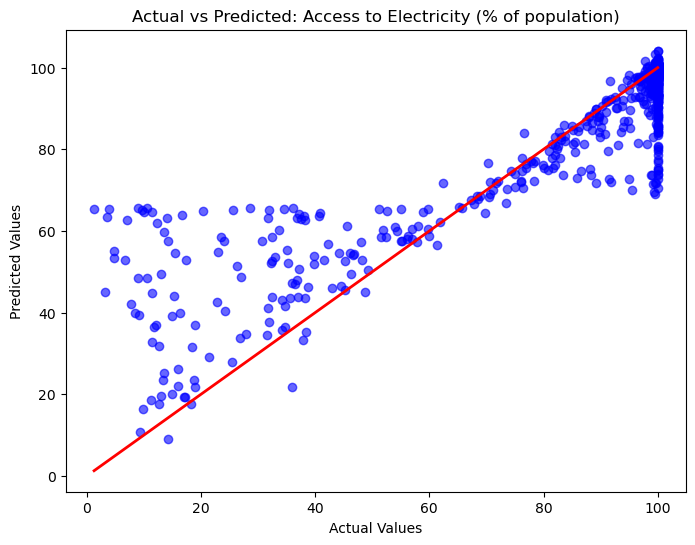

In [82]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Sustainability Dataset.csv')

# Sanitize column names to remove special characters
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')

# Adjust target column name to match sanitized format
target_column = 'Access_to_electricity__of_population__EGELCACCSZS'

# Drop rows where the target variable is NaN
df = df.dropna(subset=[target_column])

# Fill missing values for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Define features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Standardize the data for SVM
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of equality
plt.title('Actual vs Predicted: Access to Electricity (% of population)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
